# Importing Data

In [1]:
data <- read.csv('Oil_Prices.csv')
library(ggplot2)
WTI_ts <- ts(data$WTI, frequency=12, start=c(1999,9))
Brent_ts <- ts(data$Brent, frequency=12, start=c(1999,9))

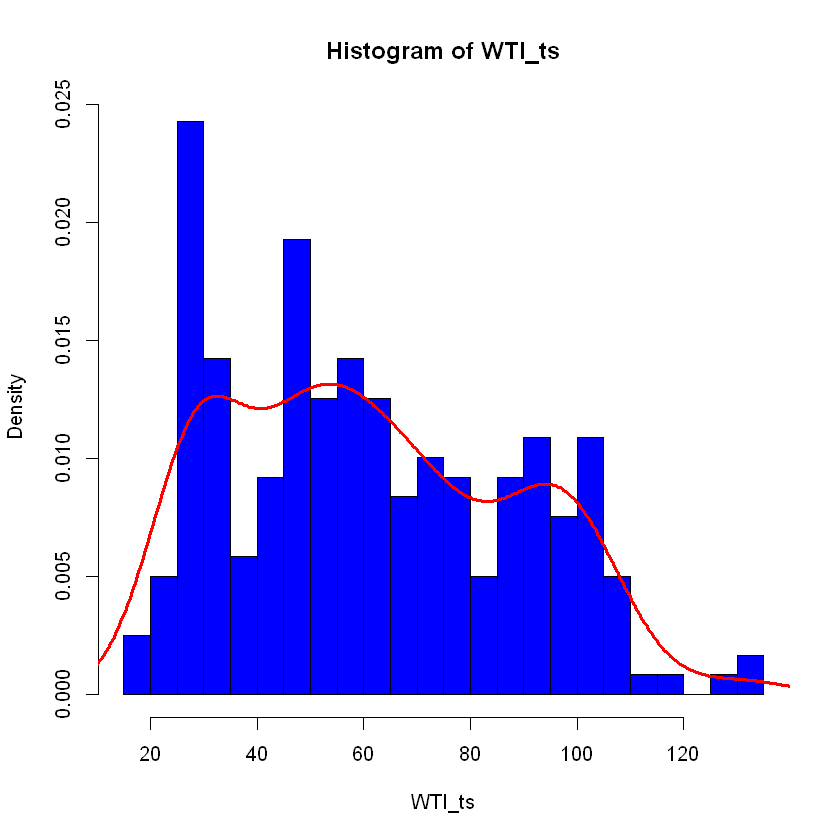

In [2]:
library(forecast)
hist(WTI_ts, breaks=20, freq=FALSE, col='blue')
lines(density(WTI_ts) , col='red', lwd=3)

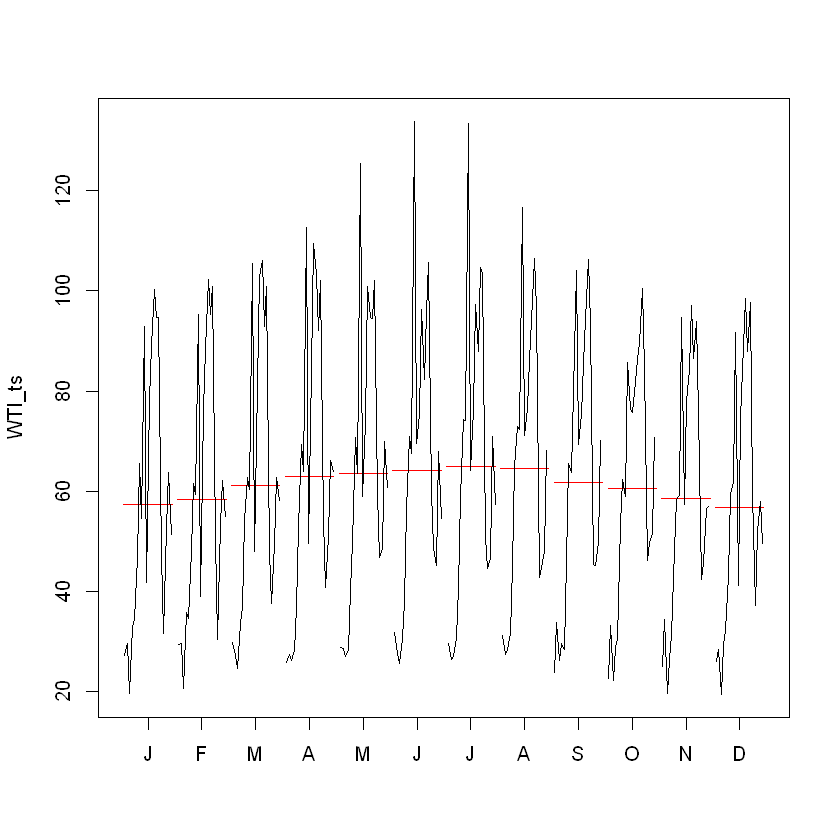

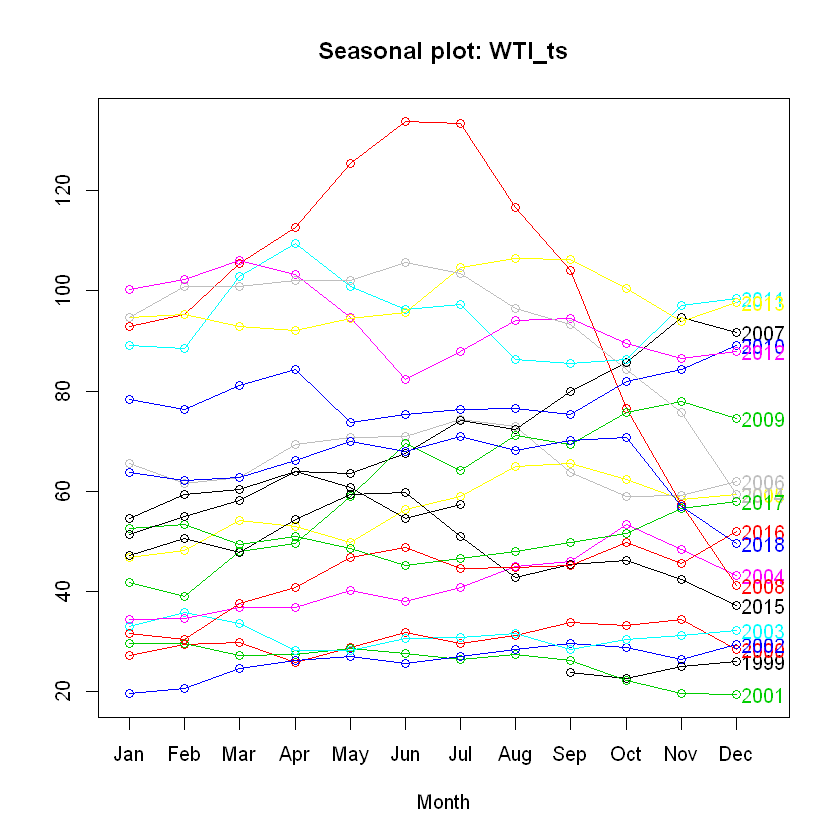

In [3]:
monthplot(WTI_ts,col.base='red')
seasonplot(WTI_ts,col=1:20, year.labels=TRUE)

In [4]:
#Question 2
# We can determine a slight seasonal pattern. We see demand increases in the end 
#of the year months,however these are not strong enough to determine seasonality.

In [4]:
t0 = c(1999,9)
t1 = c(2018,12)
t2 = c(2019,7) 
WTI_train <- window(WTI_ts, start=t0, end=t1)
WTI_test <- window(WTI_ts, start=t2)

In [5]:
library(urca)
WTI_ADF_none <- ur.df(WTI_train, type="none", lags=12, selectlags = "AIC")
summary(WTI_ADF_none)

WTI_ADF_drift <- ur.df(WTI_train, type="drift", lags=12, selectlags = "AIC")
summary(WTI_ADF_drift)

WTI_ADF_trend <- ur.df(WTI_train, type="trend", lags=12, selectlags = "AIC")
summary(WTI_ADF_trend)



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.6786  -2.9227   0.3859   3.5756  15.1228 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -0.002830   0.005101  -0.555   0.5796    
z.diff.lag1  0.345330   0.067806   5.093 7.78e-07 ***
z.diff.lag2  0.112117   0.072894   1.538   0.1255    
z.diff.lag3 -0.092718   0.073317  -1.265   0.2074    
z.diff.lag4  0.011606   0.073280   0.158   0.8743    
z.diff.lag5 -0.026684   0.073033  -0.365   0.7152    
z.diff.lag6 -0.157171   0.069030  -2.277   0.0238 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.096 on 212 degrees of freedom
Multiple R-squared:  0.1901,	Adjusted R-squared:  0.1633 
F-statistic: 7.107 on 7 and 212 DF,  p-


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.840  -3.031  -0.057   3.216  15.357 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.19712    0.90051   2.440  0.01550 *  
z.lag.1     -0.03458    0.01318  -2.623  0.00935 ** 
z.diff.lag1  0.36184    0.06698   5.402 1.74e-07 ***
z.diff.lag2  0.10259    0.06862   1.495  0.13637    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.097 on 215 degrees of freedom
Multiple R-squared:  0.1783,	Adjusted R-squared:  0.1669 
F-statistic: 15.55 on 3 and 215 DF,  p-value: 3.42e-09


Value of test-statistic is: -2.6227 3.4402 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.558  -3.095  -0.128   3.069  15.396 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.006397   0.963083   2.083   0.0384 *  
z.lag.1     -0.038191   0.014674  -2.603   0.0099 ** 
tt           0.003431   0.006074   0.565   0.5728    
z.diff.lag1  0.364230   0.067216   5.419 1.61e-07 ***
z.diff.lag2  0.106047   0.069003   1.537   0.1258    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.105 on 214 degrees of freedom
Multiple R-squared:  0.1796,	Adjusted R-squared:  0.1642 
F-statistic: 11.71 on 4 and 214 DF,  p-value: 1.285e-08


Value of test-statistic is: -2.6026 2.3925 3.5878 

Critical values for test statistics: 
   

In [6]:
#Question 3 ANSWERS

#(3.1) We fail to reject null for all test. This means WTI is not a stationary process
# for all test.

#(3.2) You cannot reject the no drift null. You do not need a drift coefficient.

#(3.3) You do not need to include a drift nor trend in our data


In [7]:
DWTI <-diff(WTI_train)
DWTI_ADF_none <- ur.df(DWTI, type="none", lags=12, selectlags = "AIC")
summary(DWTI_ADF_none)
DWTI_ADF_drift <- ur.df(DWTI, type="drift", lags=12, selectlags = "AIC")
summary(DWTI_ADF_drift)
DWTI_ADF_trend <- ur.df(DWTI, type="trend", lags=12, selectlags = "AIC")
summary(DWTI_ADF_trend)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.965  -3.116   0.309   3.493  14.885 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -0.81812    0.11572  -7.070 2.21e-11 ***
z.diff.lag1  0.16338    0.10710   1.525  0.12863    
z.diff.lag2  0.27418    0.09848   2.784  0.00585 ** 
z.diff.lag3  0.17712    0.08952   1.978  0.04917 *  
z.diff.lag4  0.18899    0.08192   2.307  0.02202 *  
z.diff.lag5  0.16246    0.06907   2.352  0.01959 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.097 on 212 degrees of freedom
Multiple R-squared:  0.3395,	Adjusted R-squared:  0.3208 
F-statistic: 18.16 on 6 and 212 DF,  p-value: < 2.2e-16


Value of test-statistic is: -7.0696 

Critical value


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.0367  -3.1880   0.2361   3.4239  14.8153 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.07151    0.34656   0.206  0.83673    
z.lag.1     -0.81946    0.11617  -7.054 2.45e-11 ***
z.diff.lag1  0.16457    0.10750   1.531  0.12728    
z.diff.lag2  0.27508    0.09880   2.784  0.00585 ** 
z.diff.lag3  0.17781    0.08979   1.980  0.04897 *  
z.diff.lag4  0.18961    0.08216   2.308  0.02198 *  
z.diff.lag5  0.16283    0.06925   2.351  0.01963 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.108 on 211 degrees of freedom
Multiple R-squared:  0.3396,	Adjusted R-squared:  0.3208 
F-statistic: 18.08 on 6 and 211 DF,  p-value: 


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.111  -3.169   0.168   3.514  14.893 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.647085   0.756225   0.856  0.39315    
z.lag.1     -0.827298   0.116601  -7.095 1.95e-11 ***
tt          -0.004727   0.005519  -0.856  0.39271    
z.diff.lag1  0.169742   0.107736   1.576  0.11664    
z.diff.lag2  0.279748   0.099015   2.825  0.00518 ** 
z.diff.lag3  0.181674   0.089960   2.019  0.04471 *  
z.diff.lag4  0.192694   0.082292   2.342  0.02014 *  
z.diff.lag5  0.165159   0.069348   2.382  0.01813 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.112 on 210 degrees of freedom
Multiple R-squared:  0.3419,	Adjusted R-squared

In [8]:
#(3.4) The best version is the no drift and no trend. Based on this we say it
# is stationary integrated order 1.

In [9]:
WTIarimaA <- auto.arima(DWTI, d=0, max.p=5, max.q=5, max.order=10,
seasonal=FALSE, stepwise=FALSE, ic='aic')
WTIarimaB <- auto.arima(DWTI, d=0, max.p=5, max.q=5, max.order=10,
seasonal=FALSE, stepwise=FALSE, ic='bic')

print(WTIarimaA)
print(WTIarimaB)

Series: DWTI 
ARIMA(0,0,2) with zero mean 

Coefficients:
         ma1     ma2
      0.3561  0.2210
s.e.  0.0644  0.0641

sigma^2 estimated as 25.34:  log likelihood=-700.22
AIC=1406.44   AICc=1406.55   BIC=1416.77
Series: DWTI 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.3794
s.e.  0.0609

sigma^2 estimated as 25.54:  log likelihood=-701.58
AIC=1407.16   AICc=1407.22   BIC=1414.05


In [10]:
#The ideal ARIMA are the following:
#AIC:
#ARIMA(0,0,4) with zero mean 

#Coefficients:
#         ma1      ma2      ma3      ma4
#      0.2376  -0.0652  -0.0582  -0.1933
#s.e.  0.0681   0.0702   0.0728   0.0649

#and

#BIC:
#ARIMA(0,0,1) with zero mean 

#Coefficients:
#         ma1
#      0.2602
#s.e.  0.0707

In [11]:
library(vars)
Brent_train <- window(Brent_ts, start=t0, end=t1)
Brent_test <- window(Brent_ts, start=t2)

df_level <-data.frame(WTI_train, Brent_train) 

Loading required package: MASS
Loading required package: strucchange
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: lmtest


In [12]:
vecm <- ca.jo(df_level, type = 'eigen', ecdet = 'const', K=2,spec='transitory')
summary(vecm)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 6.491128e-02 2.024202e-02 1.387779e-17

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 |  4.70  7.52  9.24 12.97
r = 0  | 15.44 13.75 15.67 20.20

Eigenvectors, normalised to first column:
(These are the cointegration relations)

               WTI_train.l1 Brent_train.l1   constant
WTI_train.l1      1.0000000       1.000000   1.000000
Brent_train.l1   -0.8210814      -1.508612  -1.247808
constant         -8.8830027      37.927539 -72.322840

Weights W:
(This is the loading matrix)

              WTI_train.l1 Brent_train.l1     constant
WTI_train.d    -0.18051400     0.02515130 1.194322e-17
Brent_train.d  -0.09298904     0.03386594 7.611391e-18


In [13]:
#(5.1) The null r=0 is rejected so there is atleast 1 cointegration factor. The 
# second test is not rejected therefore there is only one cointegration factor. 


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8808 -0.9563 -0.1142  1.1360  7.6628 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.10743    0.02788  -3.853 0.000154 ***
z.diff.lag  0.23797    0.06635   3.587 0.000415 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.039 on 215 degrees of freedom
Multiple R-squared:  0.09605,	Adjusted R-squared:  0.08764 
F-statistic: 11.42 on 2 and 215 DF,  p-value: 1.93e-05


Value of test-statistic is: -3.8528 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


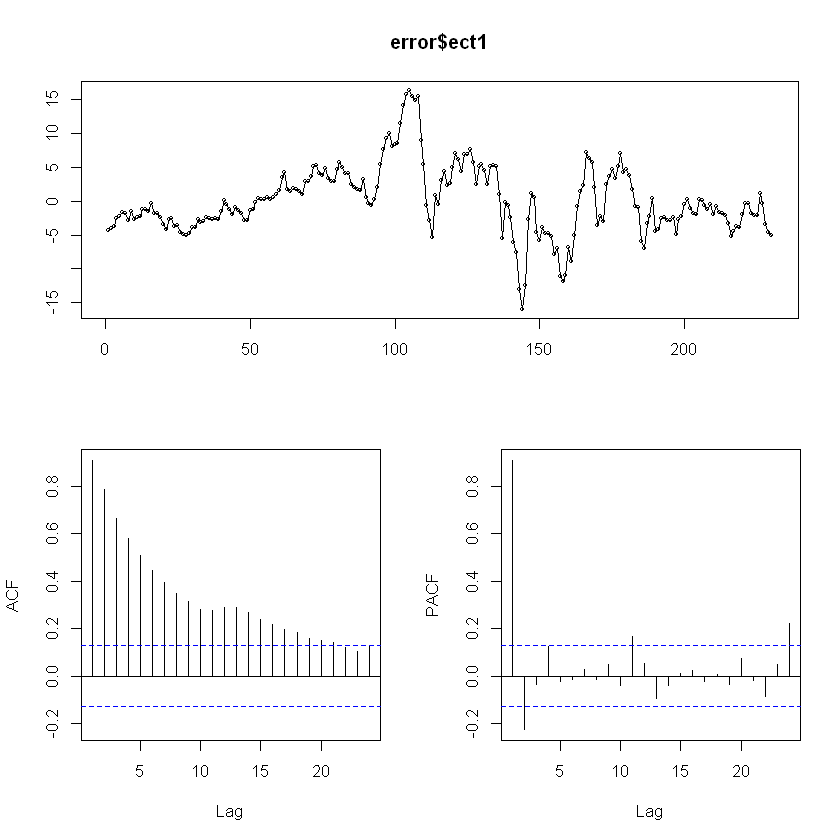

In [14]:
vecm.rls <- cajorls(vecm, r = 1)
error <- vecm.rls$rlm$model['ect1']
tsdisplay(error$ect1)
error_ADF <- ur.df(error$ect1, type="none", lags=12, selectlags = "AIC")
summary(error_ADF)

In [15]:
#(5.2) The error correction term is stationary and is not a white noise process.

In [16]:
cajorls(vecm)
coef(summary(cajorls(vecm)$rlm))

$rlm

Call:
lm(formula = substitute(form1), data = data.mat)

Coefficients:
                 WTI_train.d  Brent_train.d
ect1             -0.18051     -0.09299     
WTI_train.dl1     0.34204      0.16437     
Brent_train.dl1   0.05665      0.21788     


$beta
                     ect1
WTI_train.l1    1.0000000
Brent_train.l1 -0.8210814
constant       -8.8830027


Response WTI_train.d :
                   Estimate Std. Error    t value    Pr(>|t|)
ect1            -0.18051400 0.06765147 -2.6682940 0.008173614
WTI_train.dl1    0.34204217 0.16551253  2.0665636 0.039909834
Brent_train.dl1  0.05665366 0.15923166  0.3557939 0.722325309

Response Brent_train.d :
                   Estimate Std. Error    t value  Pr(>|t|)
ect1            -0.09298904 0.07139554 -1.3024489 0.1940828
WTI_train.dl1    0.16437299 0.17467258  0.9410349 0.3476873
Brent_train.dl1  0.21788405 0.16804411  1.2965885 0.1960893


In [17]:
#(5.3) At 5% significance WTI responds most to our error correction term

In [18]:
var.model = vec2var(vecm)
H = 12
fc <- predict(var.model, n.ahead=H)

In [19]:
WTI_forecast <- ts(fc$fcst$WTI_train[1:H,1], frequency=12, start=t2)
Brent_forecast <- ts(fc$fcst$Brent_train[1:H,1], frequency=12, start=t2)

In [20]:
print('WTI error')
x = accuracy(WTI_forecast,WTI_test)
cat('RMSE:',x[1,'RMSE'], '\n')
cat('MAE:',x[1,'MAE'], '\n')

print('Brent error')
y = accuracy(Brent_forecast,Brent_test)
cat('RMSE:',y[1,'RMSE'], '\n')
cat('MAE:',y[1,'MAE'], '\n')

[1] "WTI error"
RMSE: 9.627302 
MAE: 9.627302 
[1] "Brent error"
RMSE: 8.792367 
MAE: 8.792367 


In [21]:
WTI_forecast

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2019                                                       47.72270 48.14120
2020 54.20907 55.08834 55.83782 56.47443 57.01421 57.47147                  
          Sep      Oct      Nov      Dec
2019 49.33075 50.69714 52.00837 53.18476
2020                                    

In [22]:
Brent_forecast

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2019                                                       55.12763 54.94322
2020 58.52140 59.08564 59.56780 59.97786 60.32577 60.62059                  
          Sep      Oct      Nov      Dec
2019 55.51625 56.31419 57.12407 57.86739
2020                                    